## K-Means Clustering Algorithm

### Input the 'grades' data into a dataframe
The dataset contains four columns. The first column 'Student' is the Student ID, and the other three columns are the grades in the three subject areas. We do not use the 'Student' variable in the clustering analysis. We try to group the students according to their performance in the three subjects.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grades = pd.read_csv("data/grades.csv")
grades.head()

,Student,English,Math,Science
0,1,99,96,97
1,2,99,96,97
2,3,98,97,97
3,4,95,100,95
4,5,95,96,96


### Determine the number of clusters (with Elbow Method)
K-means is an unsupervised machine learning algorithm that groups a dataset into a user-specified number (k) of clusters. The algorithm clusters the data into k clusters, even if k is not the right number of clusters to use. So, when using k-means clustering, we need a way to determine whether they are using the right number of clusters. So, we use the elbow method to determine the optimal number of clusters for k-means clustering. As the Within Sum of Squares (WSS) does not reduce much after cluster 3, we choose k=3 clusters for clustering this dataset. <br>

We don't need to compute the within-cluster SSE explicitly, as it is already accessible through the inertia_ attribute after fitting a KMeans model.

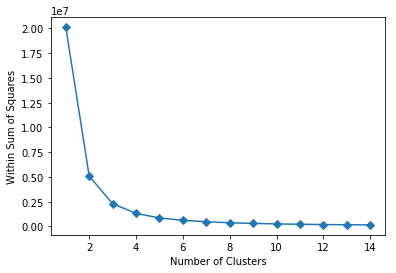

In [58]:
from sklearn.cluster import KMeans
from sklearn import metrics
%matplotlib inline

wss = []

for i in range(1, 15):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(grades)
    wss.append(km.inertia_)
    
plt.plot(range(1,15), wss, marker='D')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.show()

With more time, KMeans will always converge, however this may be to a local minimum. This depends on the initialization of the centroids. So, the default "k-means++" initialization scheme, has been implemented. This method generally initializes the centroids to be far from each other, which gives better results than random initialization.

KMeans Clustering, with 3 clusters is applied to the dataset 

In [33]:
# KMeans Cluster (n=3)

km_3 = KMeans(n_clusters=3)
km_3.fit(grades)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

The predicted clusters are obtained and are stored in 'y_pred'

In [34]:
y_pred = km_3.predict(grades)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

The coordinates of the cluster centers are obtained below:

In [35]:
centers = km_3.cluster_centers_
centers

array([[ 308.        ,   84.97101449,   77.22705314,   79.04830918],
       [ 515.92822967,   72.77990431,   66.59808612,   66.04784689],
       [ 102.5       ,   95.43137255,   90.09313725,   93.45098039]])

The large circles, red in colour, represent the location of the cluster means we got earlier. The small circles, with different colours, represent the students corresponding to the appropriate cluster by assigned color: blue, yellow or purple. The plots indicate the 3 clusters of students: the top academic students (purple), the academically weak students (blue), and the average students (yellow) who fall somewhere between those two groups. The plots also highlight the students who excel in one or two subjects but struggle in others.<br>

With English and Math scores, the clusters look like the below graph.

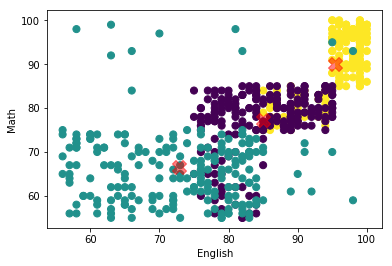

In [36]:
%matplotlib inline

plt.scatter(grades.iloc[:, 1], grades.iloc[:, 2], c=y_pred, s=50, cmap='viridis')
plt.xlabel("English")
plt.ylabel("Math")
centers = km_3.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker = 'X', s=200, alpha=0.5)

With English and Science scores, the clusters look like the below graph

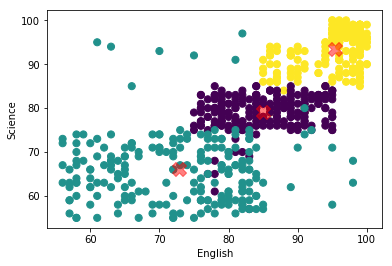

In [37]:
%matplotlib inline

plt.scatter(grades.iloc[:, 1], grades.iloc[:, 3], c=y_pred, s=50, cmap='viridis')
plt.xlabel("English")
plt.ylabel("Science")
centers = km_3.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='red', marker = 'X', s=200, alpha=0.5)

With Science and Math scores, the clusters look like the below graph

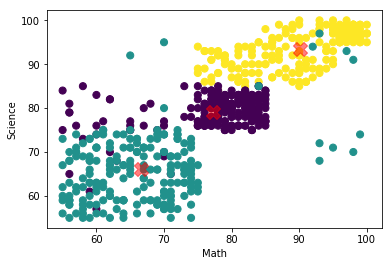

In [38]:
%matplotlib inline

plt.scatter(grades.iloc[:, 2], grades.iloc[:, 3], c=y_pred, s=50, cmap='viridis')
plt.xlabel("Math")
plt.ylabel("Science")
centers = km_3.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', marker = 'X', s=200, alpha=0.5)

#### NOTE - Please run the cell twice if the 3D plot doesn't appear

We can actually visualize the clusters better with a 3D plot. When we move the plot towards the right and observe, we can see that the purple color points at the top-right and away from us are the students who scored well in all 3 subjects, whereas the blue color points at the bottom-left and towards us are the students who scored less in all the 3 subjects. And the yellow color points are the students who are probably average students, who neither scored high nor too low on the three subjects. 

<IPython.core.display.Javascript object>


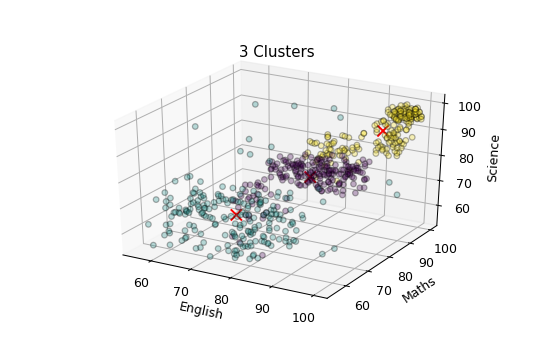

In [41]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(grades.iloc[:, 1], grades.iloc[:, 2], grades.iloc[:, 3], c=y_pred, edgecolor='k', alpha=0.3)

ax.scatter(centers[:, 1], centers[:, 2], centers[:, 3], c='r', s=80, marker = "x", alpha=1)

ax.set_xlabel('English')
ax.set_ylabel('Maths')
ax.set_zlabel('Science')
ax.set_title('3 Clusters')

plt.show()

### What if only 2 clusters are initialized

In [42]:
# KMeans Cluster (n=2)
km_2 = KMeans(n_clusters=2)
km_2.fit(grades)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [43]:
y_pred_2 = km_2.predict(grades)
print(y_pred_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Below are the plots when only 2 clusters are initialized

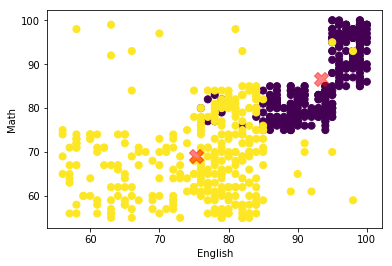

In [44]:
%matplotlib inline

plt.scatter(grades.iloc[:, 1], grades.iloc[:, 2], c=y_pred_2, s=50, cmap='viridis')
plt.xlabel("English")
plt.ylabel("Math")
centers = km_2.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker = 'X', s=200, alpha=0.5)

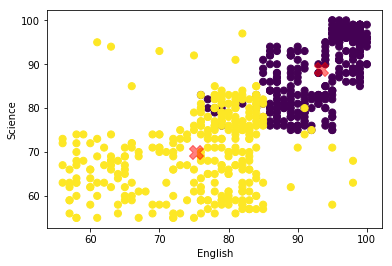

In [45]:
%matplotlib inline

plt.scatter(grades.iloc[:, 1], grades.iloc[:, 3], c=y_pred_2, s=50, cmap='viridis')
plt.xlabel("English")
plt.ylabel("Science")
centers = km_2.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='red', marker = 'X', s=200, alpha=0.5)

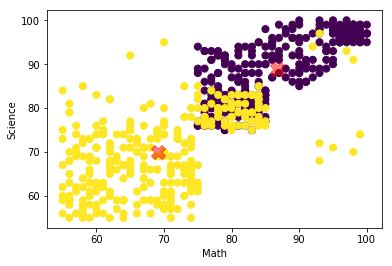

In [46]:
%matplotlib inline

plt.scatter(grades.iloc[:, 2], grades.iloc[:, 3], c=y_pred_2, s=50, cmap='viridis')
plt.xlabel("Math")
plt.ylabel("Science")
centers = km_2.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', marker = 'X', s=200, alpha=0.5)

We might miss some information if less than ideal clusters are taken into account for the analysis

<IPython.core.display.Javascript object>


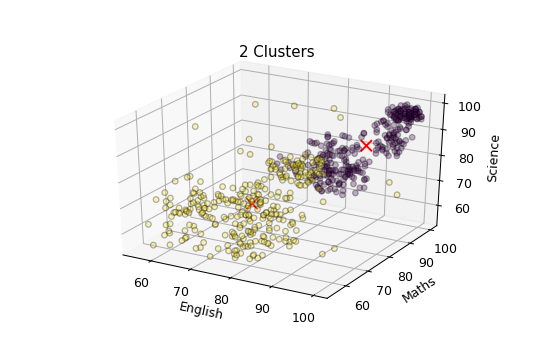

In [48]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(grades.iloc[:, 1], grades.iloc[:, 2], grades.iloc[:, 3], c=y_pred_2, edgecolor='k', alpha=0.3)

ax.scatter(centers[:, 1], centers[:, 2], centers[:, 3], c='r', s=80, marker = "x", alpha=1)

ax.set_xlabel('English')
ax.set_ylabel('Maths')
ax.set_zlabel('Science')
ax.set_title('2 Clusters')

plt.show()

### What if 5 clusters are initialized

In [49]:
# KMeans Cluster (n=5)
km_5 = KMeans(n_clusters=5)
km_5.fit(grades)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
y_pred_5 = km_5.predict(grades)
print(y_pred_5)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

Below are the plots when 5 clusters are initialized. As we can see from the below graphs, the clusters obtained are not neat and uniform, which says that the ideal number of clusters is not taken.

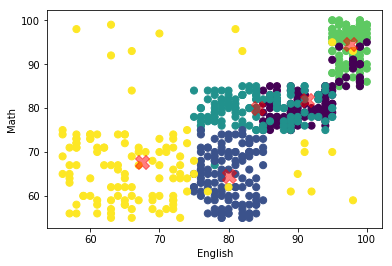

In [51]:
%matplotlib inline

plt.scatter(grades.iloc[:, 1], grades.iloc[:, 2], c=y_pred_5, s=50, cmap='viridis')
plt.xlabel("English")
plt.ylabel("Math")
centers = km_5.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker = 'X', s=200, alpha=0.5)

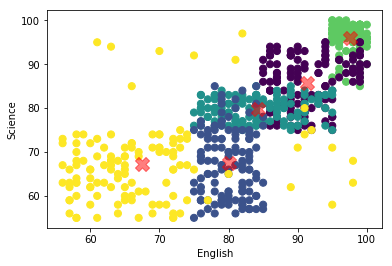

In [52]:
%matplotlib inline

plt.scatter(grades.iloc[:, 1], grades.iloc[:, 3], c=y_pred_5, s=50, cmap='viridis')
plt.xlabel("English")
plt.ylabel("Science")
centers = km_5.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 3], c='red', marker = 'X', s=200, alpha=0.5)

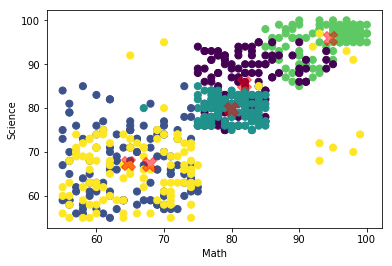

In [53]:
%matplotlib inline

plt.scatter(grades.iloc[:, 2], grades.iloc[:, 3], c=y_pred_5, s=50, cmap='viridis')
plt.xlabel("Math")
plt.ylabel("Science")
centers = km_5.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c='red', marker = 'X', s=200, alpha=0.5)

As you can observe from the below 3D plot, the clusters are not ideal, and are all over the place.

<IPython.core.display.Javascript object>


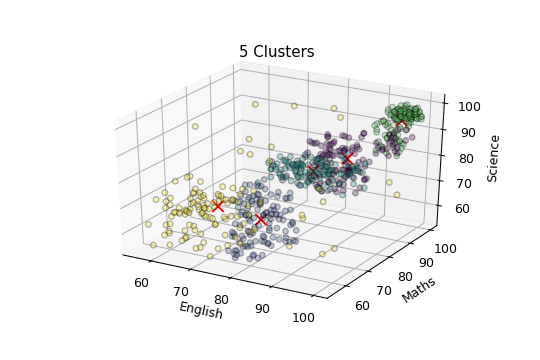

In [55]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(grades.iloc[:, 1], grades.iloc[:, 2], grades.iloc[:, 3], c=y_pred_5, edgecolor='k', alpha=0.3)

ax.scatter(centers[:, 1], centers[:, 2], centers[:, 3], c='r', s=80, marker = "x", alpha=1)

ax.set_xlabel('English')
ax.set_ylabel('Maths')
ax.set_zlabel('Science')
ax.set_title('5 Clusters')

plt.show()

### Performance Evaluation
The Silhouette Coefficient is applied to the results of a cluster analysis. As we don't know the labels, evaluation must be performed using the model itself. The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters. <br>

We observe that the coefficient is highest for cluster with 2 groups, although we have found that 3 clusters is ideal.

In [69]:
import numpy as np
from sklearn.cluster import KMeans

km_3 = KMeans(n_clusters=3)
km_3.fit(grades)

labels = km_3.labels_

print(metrics.silhouette_score(grades, labels, metric='euclidean'))


0.579441347103


In [70]:
import numpy as np
from sklearn.cluster import KMeans

km_2 = KMeans(n_clusters=2)
km_2.fit(grades)

labels = km_2.labels_

print(metrics.silhouette_score(grades, labels, metric='euclidean'))


0.620373101608


In [71]:
import numpy as np
from sklearn.cluster import KMeans

km_5 = KMeans(n_clusters=5)
km_5.fit(grades)

labels = km_5.labels_

print(metrics.silhouette_score(grades, labels, metric='euclidean'))


0.540572118622


### References

https://github.com/mlnjsh/DSBDA-Btech/blob/master/grades_km_input.csv<br>
Data Science and Big Data Analytics by Wiley Publications<br>
http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py<br>
http://marcharper.codes/2016-07-11/Clustering+with+Scikit-Learn.html